In [1]:
import sys
sys.path.append('../../')

from dl.data.txtdetn import datasets, target_transforms, transforms
%load_ext autoreload
%autoreload 2

In [2]:
augmentation = None

ignore = target_transforms.Ignore(strange=True)

transform = transforms.Compose(
    [#transforms.Resize((640, 640)),
     transforms.ToTensor(),]
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.Text2Number(class_labels=datasets.SynthText_char_labels_without_upper_blank, ignore_nolabel=False),
     target_transforms.ToTensor(textTensor=True)]
)

train_dataset = datasets.SynthTextDetectionDataset(ignore=ignore, transform=transform, target_transform=target_transform, augmentation=augmentation,
                                                   onlyAlphaNumeric=False)


In [3]:
from dl.models.fots.roi import RoIRotate

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2, torch

from dl.data.utils.converter import toVisualizeQuadsRGBimg, tensor2cvrgbimg

hello


<IPython.core.display.Javascript object>


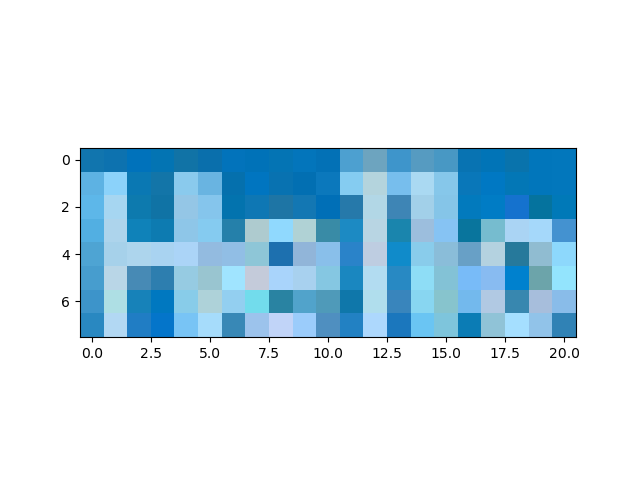

tire


<IPython.core.display.Javascript object>


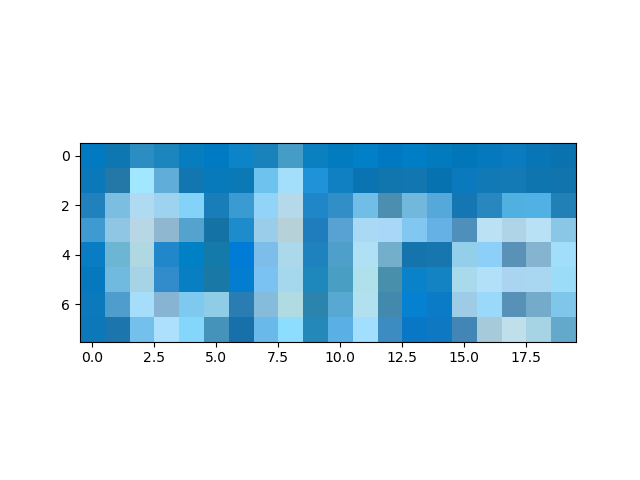

jpeg


<IPython.core.display.Javascript object>


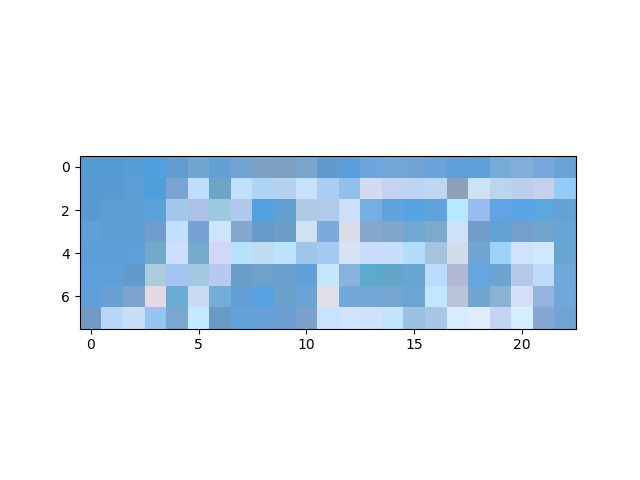

and


<IPython.core.display.Javascript object>


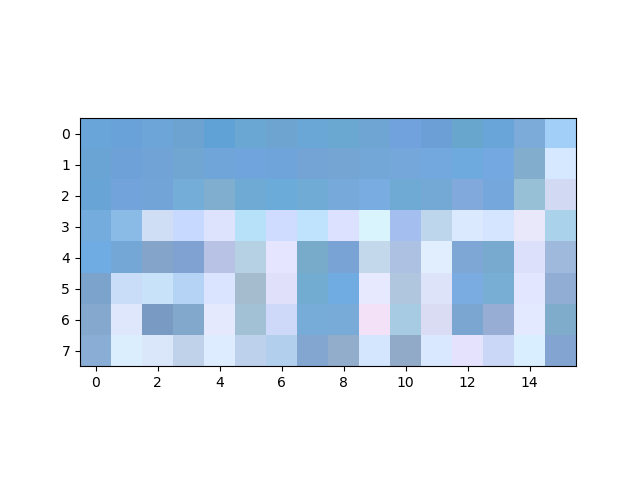

came


<IPython.core.display.Javascript object>


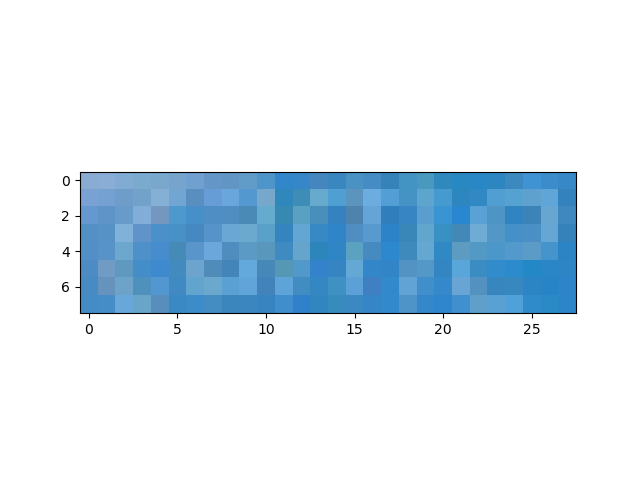

need


<IPython.core.display.Javascript object>


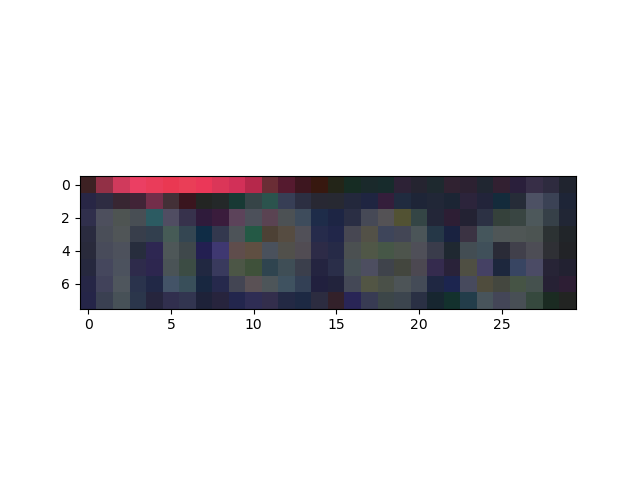

plo


<IPython.core.display.Javascript object>


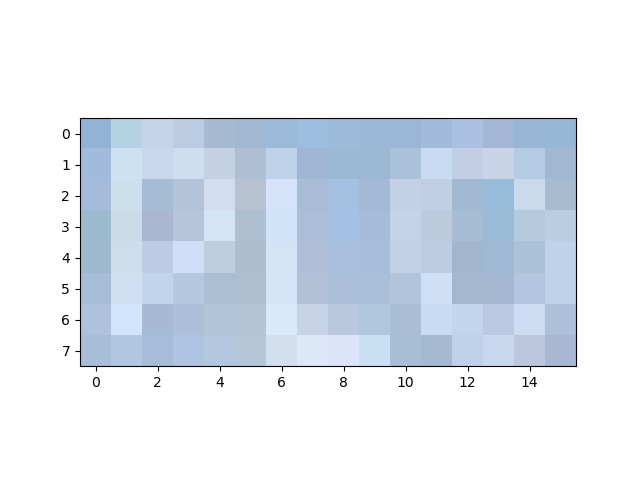

references:


<IPython.core.display.Javascript object>


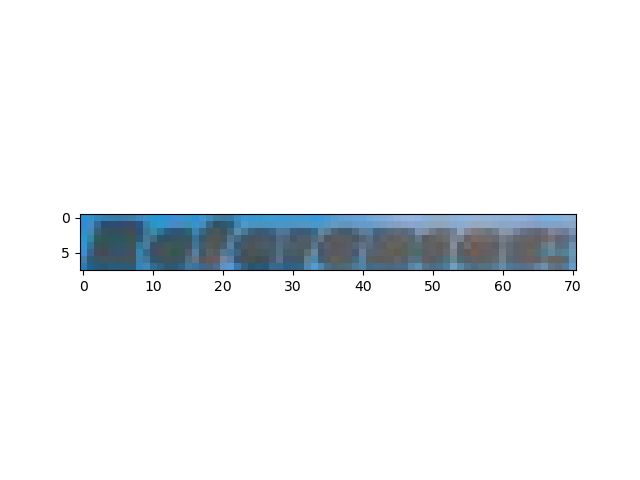

15


<IPython.core.display.Javascript object>


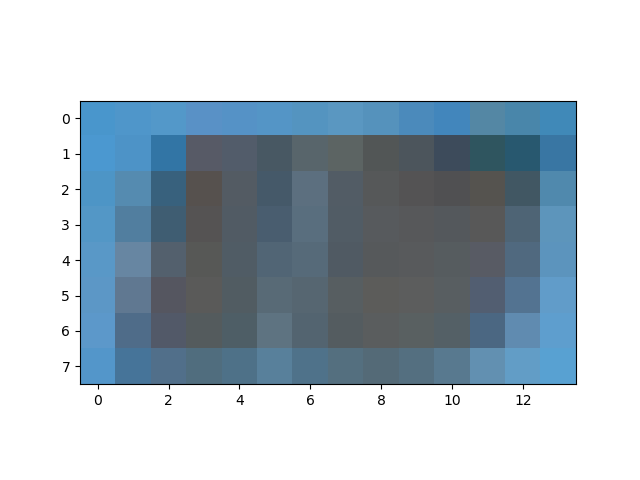

apr


<IPython.core.display.Javascript object>


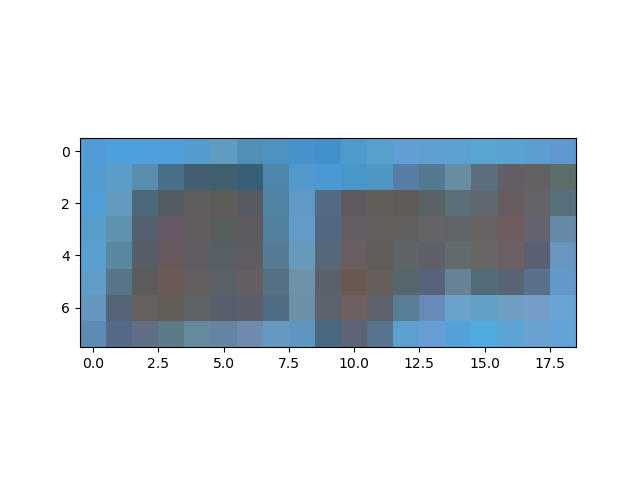

lines:


<IPython.core.display.Javascript object>


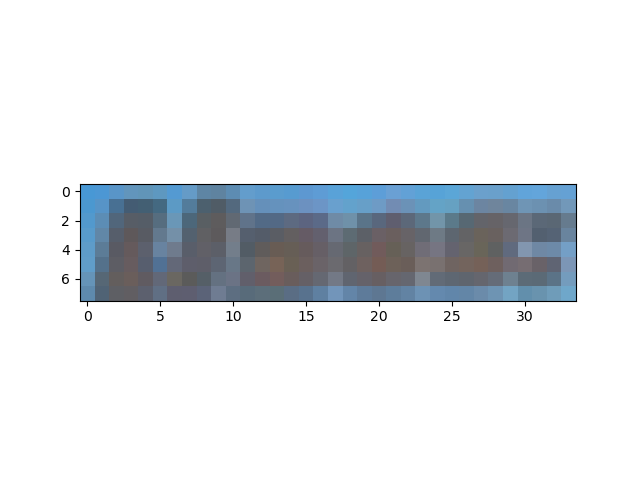

20


<IPython.core.display.Javascript object>


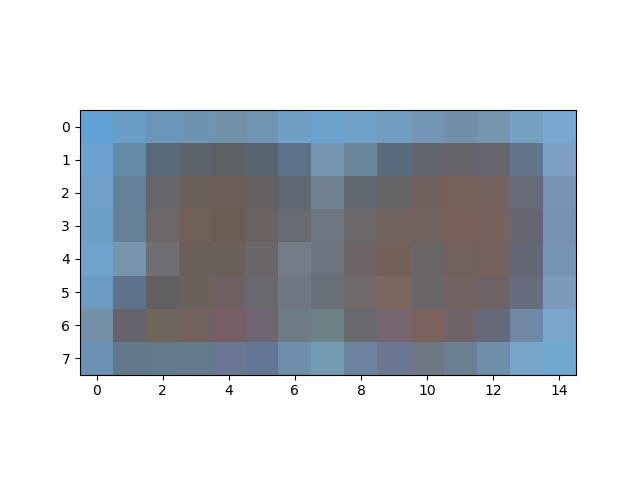

In [4]:
indices = [10]#, 100, 150, 10000]

for index in indices:
    img, targets, texts = train_dataset[index]
    
    c, h, w = img.shape
    
    roiRotate =  RoIRotate(height=8, _debug=True)
    dummy_pred_locs = torch.arange(h*w*6).reshape((1, h, w, 6))
    true_locs = [targets]

    
    
    imgs = roiRotate(img.unsqueeze(0), dummy_pred_locs, true_locs)
    for i, img in enumerate(imgs[0]):
        print(''.join([datasets.SynthText_char_labels_without_upper_blank[c.item()] for c in texts[i]]))
        plt.figure()
        plt.imshow(img)
    """
    converted_imgs = roiRotate(img.unsqueeze(0), dummy_pred_locs, true_locs)
    for conv_img in converted_imgs[0]:
        img = tensor2cvrgbimg(conv_img)
    
        plt.figure()
        plt.imshow(img)
    
    #img = toVisualizeQuadsRGBimg(img, locs)#, , texts)
    """

hello


<IPython.core.display.Javascript object>


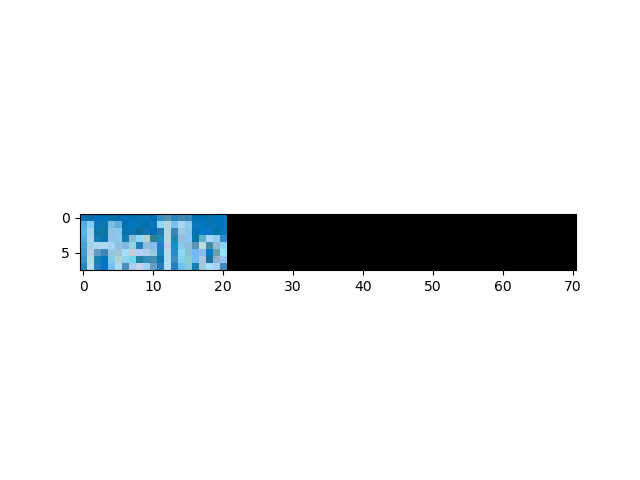

tire


<IPython.core.display.Javascript object>


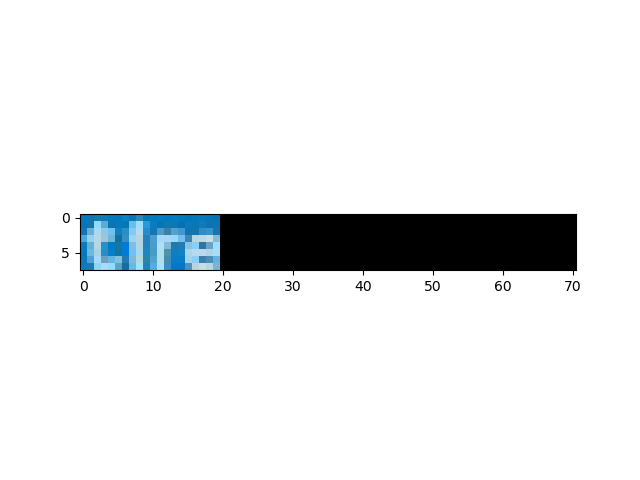

jpeg


<IPython.core.display.Javascript object>


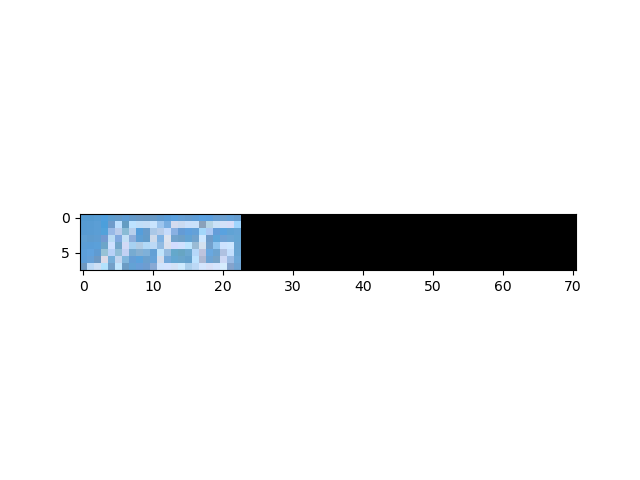

and


<IPython.core.display.Javascript object>


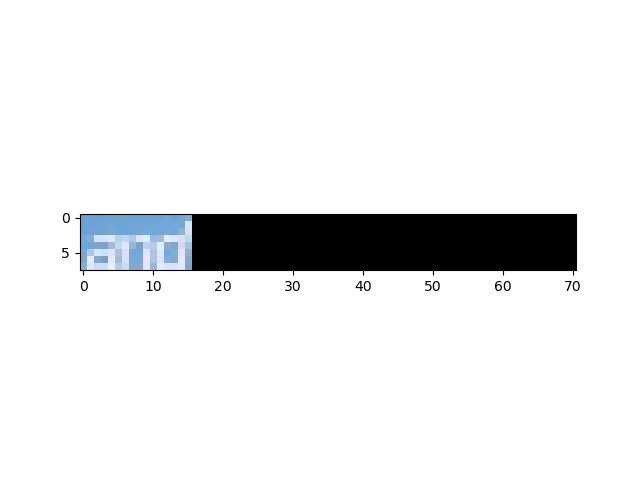

came


<IPython.core.display.Javascript object>


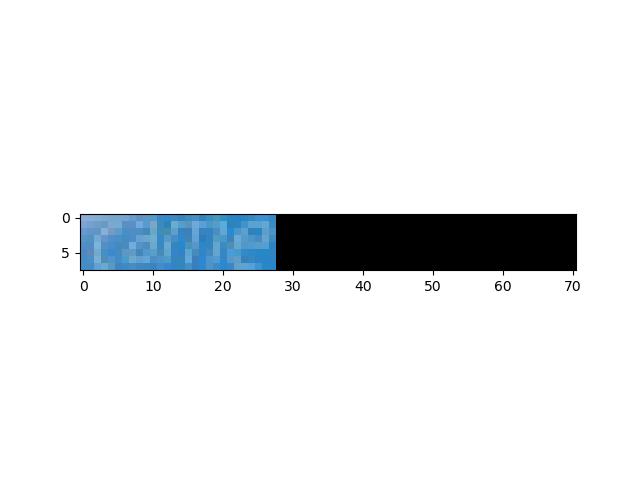

need


<IPython.core.display.Javascript object>


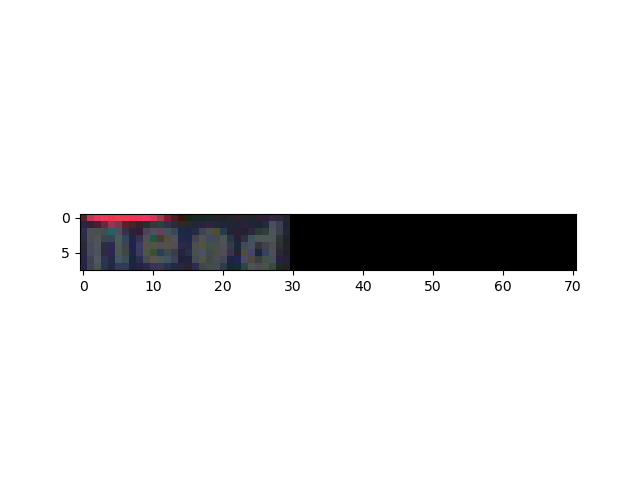

plo


<IPython.core.display.Javascript object>


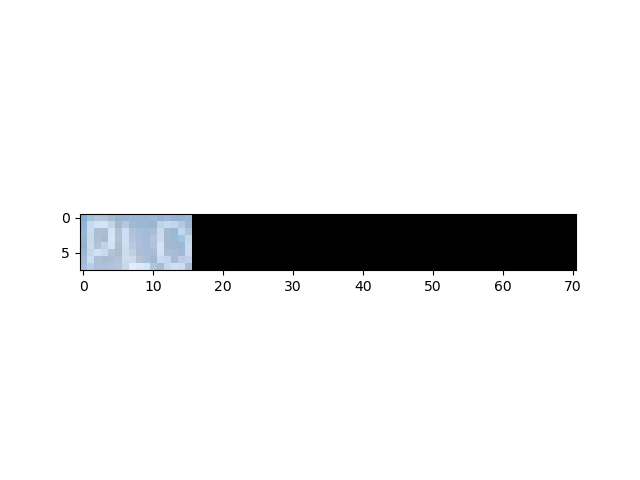

references:


<IPython.core.display.Javascript object>


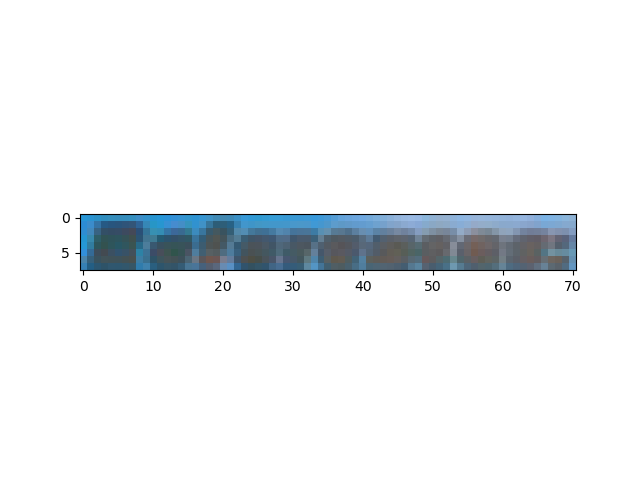

15


/home/kado/.pyenv/versions/anaconda3-2019.07/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


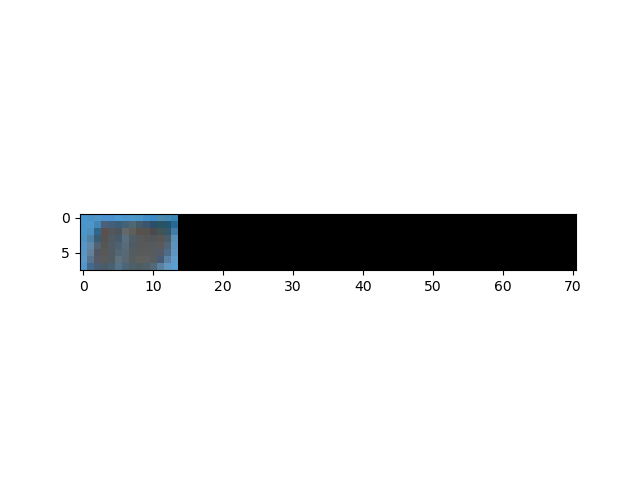

apr


<IPython.core.display.Javascript object>


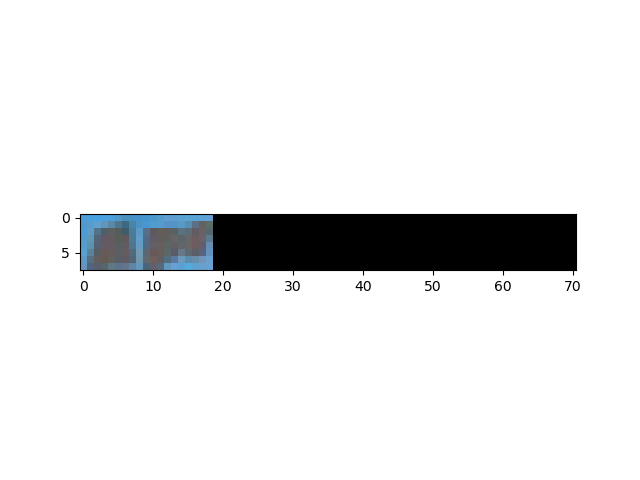

lines:


<IPython.core.display.Javascript object>


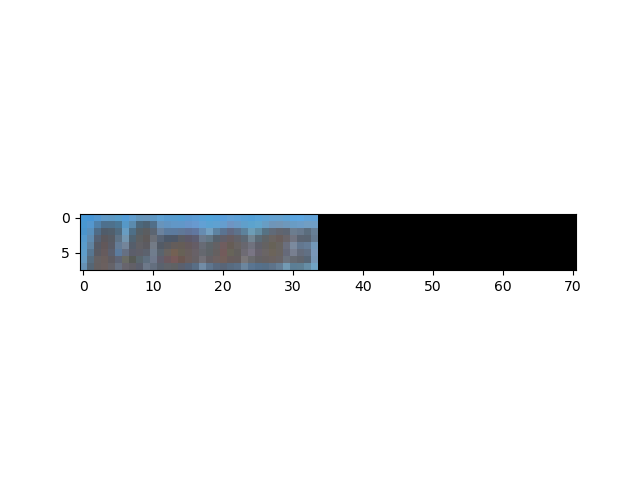

20


<IPython.core.display.Javascript object>


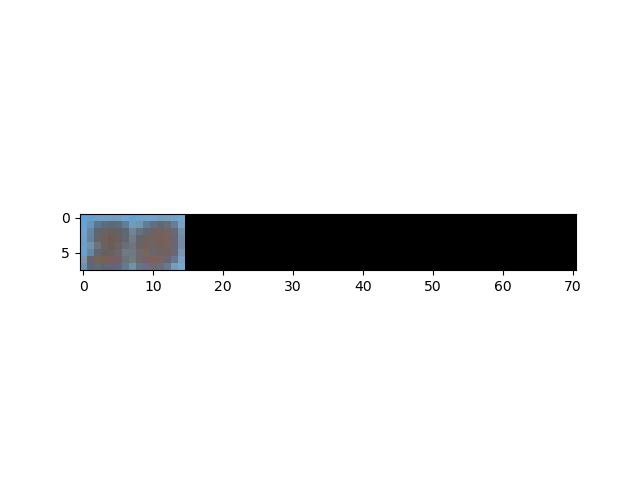

In [6]:
indices = [10]#, 100, 150, 10000]

for index in indices:
    img, targets, texts = train_dataset[index]
    
    c, h, w = img.shape
    
    roiRotate =  RoIRotate(height=8)
    dummy_pred_locs = torch.arange(h*w*6).reshape((1, h, w, 6))
    true_locs = [targets]

    
    converted_imgs = roiRotate(img.unsqueeze(0), dummy_pred_locs, true_locs)
    for i, conv_img in enumerate(converted_imgs[0]):
        print(''.join([datasets.SynthText_char_labels_without_upper_blank[c.item()] for c in texts[i]]))
        img = tensor2cvrgbimg(conv_img)
    
        plt.figure()
        plt.imshow(img)
    
    #img = toVisualizeQuadsRGBimg(img, locs)#, , texts)
